In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import glob
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt
from tqdm import tqdm
import sklearn.metrics as skm
import tensorflow as tf
from pastillation.analysis.load_cv_result import load_cv_result


COLORS = []
colors = pplt.Cycle('ggplot')
for color in colors:
    COLORS.append(color['color'])
colors = pplt.Cycle('default')
for color in colors:
    COLORS.append(color['color'])

pplt.rc['figure.facecolor'] = 'white'

PLOT_DIR = "/Pastillation/notebook/figure/"
RESULT_PICKLE_DIR = "/Pastillation/result_pickle/"
WEIGHT_DIR = "/Pastillation/weight/"

### Load and Concatenate Cross-Validation Results

In [111]:
y_tests_1d, y_preds_1d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="1d")
    y_tests_1d.append(y_test)
    y_preds_1d.append(y_pred)

y_tests_1d = np.concatenate(y_tests_1d, axis=0).squeeze()
y_preds_1d = np.concatenate(y_preds_1d, axis=0).squeeze()

y_tests_2d, y_preds_2d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="2d")
    y_tests_2d.append(y_test)
    y_preds_2d.append(y_pred)

y_tests_2d = np.concatenate(y_tests_2d, axis=0).squeeze()
y_preds_2d = np.concatenate(y_preds_2d, axis=0).squeeze()

print(y_preds_2d.shape)

(20000, 2)


### Compute RMSE and R2 for 1D and 2D Models (Temperature)


In [ ]:
rmse_1d, r2_1d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="1d")
    
    fold_rmse = skm.mean_squared_error(y_test[:, 0]+72, y_pred[:, 0]+72) ** 0.5
    fold_r2 = skm.r2_score(y_test[:, 0]+72, y_pred[:, 0]+72)
    
    rmse_1d.append(fold_rmse)
    r2_1d.append(fold_r2)
    
rmse_2d, r2_2d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="2d")
    
    fold_rmse = skm.mean_squared_error(y_test[:, 0]+72, y_pred[:, 0]+72) ** 0.5
    fold_r2 = skm.r2_score(y_test[:, 0]+72, y_pred[:, 0]+72)
    
    rmse_2d.append(fold_rmse)
    r2_2d.append(fold_r2)

print(f"PaNet-1D RMSE: {np.mean(rmse_1d):.4f}, {np.std(rmse_1d):.4f}")
print(f"PaNet-2D RMSE: {np.mean(rmse_2d):.4f}, {np.std(rmse_2d):.4f}")

print(f"PaNet-1D R2: {np.mean(r2_1d):.4f}, {np.std(r2_1d):.4f}")
print(f"PaNet-2D R2: {np.mean(r2_2d):.4f}, {np.std(r2_2d):.4f}")


PaNet-1D RMSE: 1.2472, 0.0157
PaNet-2D RMSE: 1.3794, 0.0157
PaNet-1D R2: 0.9611, 0.0020
PaNet-2D R2: 0.9525, 0.0014


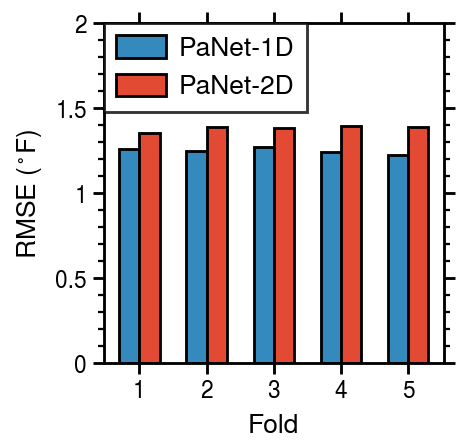

In [ ]:
width = 1.7
width_default = 2.5
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, ax = pplt.subplots(refwidth=width, refheight=width)

ax.bar(np.arange(5)-0.15+1, rmse_1d, c=COLORS[1], width=0.3, edgecolor="k", label="PaNet-1D", edgewidth=lw)
ax.bar(np.arange(5)+0.15+1, rmse_2d, c=COLORS[0], width=0.3, edgecolor="k", label="PaNet-2D", edgewidth=lw)

ax.minorticks_on()
ax.tick_params(right=True, which="both")
ax.tick_params(top=True, which="major")
ax.tick_params(axis='x', which='minor', bottom=False)

lgd = ax.legend(ncol=1, loc="upper left", handleheight=lw)
lgd.get_frame().set_linewidth(lw)

for text in lgd.get_texts():
    text.set_fontsize(font_big)

ax.grid()

ax.format(
    ylim=[0, 2],
    xticks=[1,2,3,4,5],
    yticks=[0, 0.5, 1, 1.5, 2.0],
    xlabel=r"Fold",
    ylabel=r"RMSE ($^\circ$F)",
    xlabelsize=font_big,
    ylabelsize=font_big,
    xticklabelsize=font_small,
    yticklabelsize=font_small,
    titleweight="bold",
    tickdir="out",
    linewidth=lw,
)

fig.save(PLOT_DIR+'ml_pred_2.png', dpi=600)

### Compute RMSE and R2 for 1D and 2D Models (Flow Rate)


In [129]:
rmse_1d, r2_1d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="1d")
    
    fold_rmse = skm.mean_squared_error(y_test[:, 1], y_pred[:, 1]) ** 0.5
    fold_r2 = skm.r2_score(y_test[:, 1], y_pred[:, 1])
    
    rmse_1d.append(fold_rmse)
    r2_1d.append(fold_r2)
    
rmse_2d, r2_2d = [], []

for fold in range(5):
    _, _, _, y_test, y_pred, _, _ = load_cv_result(RESULT_PICKLE_DIR, fold=fold, verbose=False, mode="2d")
    
    fold_rmse = skm.mean_squared_error(y_test[:, 1], y_pred[:, 1]) ** 0.5
    fold_r2 = skm.r2_score(y_test[:, 1], y_pred[:, 1])
    
    rmse_2d.append(fold_rmse)
    r2_2d.append(fold_r2)

print(f"PaNet-1D RMSE: {np.mean(rmse_1d):.4f}, {np.std(rmse_1d):.4f}")
print(f"PaNet-2D RMSE: {np.mean(rmse_2d):.4f}, {np.std(rmse_2d):.4f}")

print(f"PaNet-1D R2: {np.mean(r2_1d):.4f}, {np.std(r2_1d):.4f}")
print(f"PaNet-2D R2: {np.mean(r2_2d):.4f}, {np.std(r2_2d):.4f}")


PaNet-1D RMSE: 0.3269, 0.0297
PaNet-2D RMSE: 0.4663, 0.0117
PaNet-1D R2: 0.9981, 0.0003
PaNet-2D R2: 0.9961, 0.0002


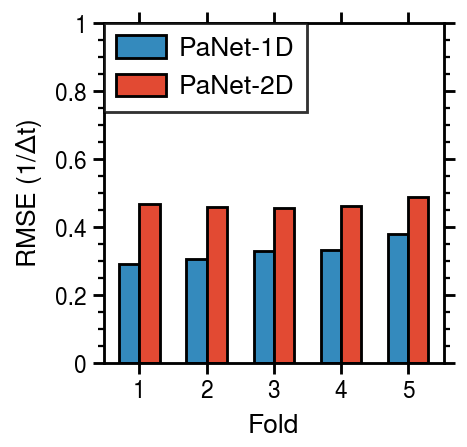

In [ ]:
width = 1.7
width_default = 2.5
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, ax = pplt.subplots(refwidth=width, refheight=width)

ax.bar(np.arange(5)-0.15+1, rmse_1d, c=COLORS[1], width=0.3, edgecolor="k", label="PaNet-1D", edgewidth=lw)
ax.bar(np.arange(5)+0.15+1, rmse_2d, c=COLORS[0], width=0.3, edgecolor="k", label="PaNet-2D", edgewidth=lw)

ax.minorticks_on()
ax.tick_params(right=True, which="both")
ax.tick_params(top=True, which="major")
ax.tick_params(axis='x', which='minor', bottom=False)

lgd = ax.legend(ncol=1, loc="upper left", handleheight=lw)
lgd.get_frame().set_linewidth(lw)

for text in lgd.get_texts():
    text.set_fontsize(font_big)

ax.grid()

ax.format(
    ylim=[0, 1],
    xticks=[1,2,3,4,5],
    yticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
    xlabel=r"Fold",
    ylabel=r"RMSE (1/$\Delta t$)",
    xlabelsize=font_big,
    ylabelsize=font_big,
    xticklabelsize=font_small,
    yticklabelsize=font_small,
    titleweight="bold",
    tickdir="out",
    linewidth=lw,
)

fig.save(PLOT_DIR+'ml_pred_22.png', dpi=600)

### Parity Plots

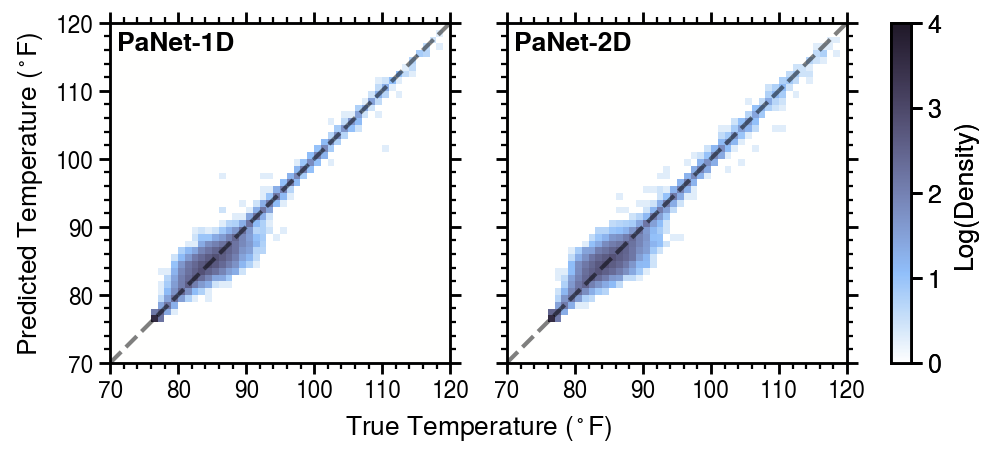

In [114]:
width = 1.7
width_default = 2.5
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, axs = pplt.subplots(refwidth=width, refheight=width, ncols=2)

bins = 50
for ax, y_tests, y_preds, label, position in zip(
    axs,
    [y_tests_1d[:, 0] + 72, y_tests_2d[:, 0] + 72],
    [y_preds_1d[:, 0] + 72, y_preds_2d[:, 0] + 72],
    ["PaNet-1D", "PaNet-2D"],
    [(71, 116), (71, 116)]
):
    hist, xedges, yedges = np.histogram2d(y_tests, y_preds, bins=bins, range=[[70, 120], [70, 120]])
    hist_log = np.log10(hist + 1)

    im = ax.imshow(
        hist_log.T,
        origin="lower",
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
        cmap="dusk",
        vmin=0,
        vmax=4,
        aspect="auto",
        zorder=2,
    )
    ax.plot([70, 120], [70, 120], 'k--', alpha=0.5, zorder=3)
    ax.tick_params(top=True, right=True, which="both")
    ax.minorticks_on()

    ax.text(position[0], position[1], label, fontsize=font_big, fontweight="bold", color="black", zorder=3)

    ax.grid()
    ax.format(
        xticks=[70, 80, 90, 100, 110, 120],
        yticks=[70, 80, 90, 100, 110, 120],
        xlim=[70, 120],
        ylim=[70, 120],
        xlabel=r"True Temperature ($^\circ$F)",
        ylabel=r"Predicted Temperature ($^\circ$F)",
        xlabelsize=font_big,
        ylabelsize=font_big,
        xticklabelsize=font_small,
        yticklabelsize=font_small,
        titleweight="bold",
        tickdir="out",
        linewidth=lw,
    )

cbar = fig.colorbar(
    im,
    label="Log(Density)",
    loc="r",
    width=0.1,
    shrink=1.0,
    linewidth=lw,
    labelsize=font_big,
    ticks=[0, 1, 2, 3, 4]
)

cbar.solids.set_edgecolor("face")

fig.save(PLOT_DIR+'ml_pred_3.png', dpi=600)

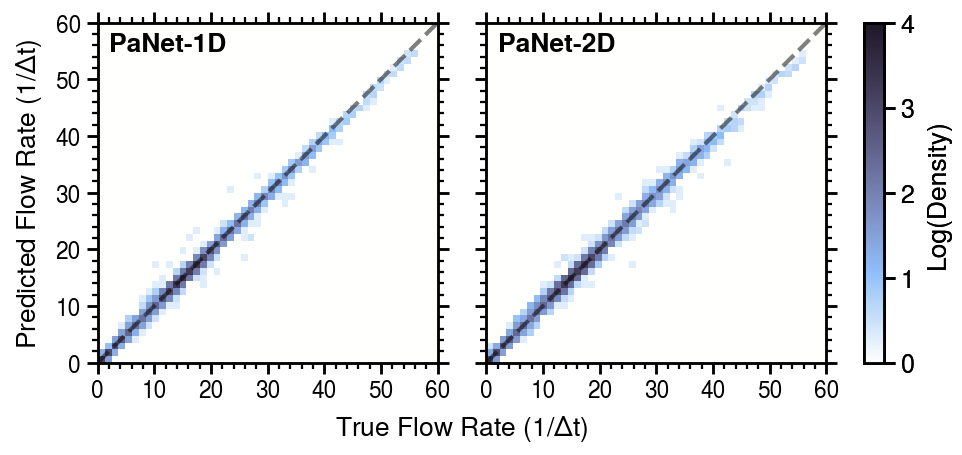

In [124]:
width = 1.7
width_default = 2.5
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, axs = pplt.subplots(refwidth=width, refheight=width, ncols=2)

bins = 50
for ax, y_tests, y_preds, label, position in zip(
    axs,
    [y_tests_1d[:, 1], y_tests_2d[:, 1]],
    [y_preds_1d[:, 1], y_preds_2d[:, 1]],
    ["PaNet-1D", "PaNet-2D"],
    [(2, 55), (2, 55)]
):
    hist, xedges, yedges = np.histogram2d(y_tests, y_preds, bins=bins, range=[[0, 60], [0, 60]])
    hist_log = np.log10(hist + 1)

    im = ax.imshow(
        hist_log.T,
        origin="lower",
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
        cmap="dusk",
        vmin=0,
        vmax=4,
        aspect="auto",
        zorder=2,
    )
    ax.plot([0, 60], [0, 60], 'k--', alpha=0.5, zorder=3)
    ax.tick_params(top=True, right=True, which="both")
    ax.minorticks_on()

    ax.text(position[0], position[1], label, fontsize=font_big, fontweight="bold", color="black", zorder=3)

    ax.grid()
    ax.format(
        xticks=[0, 10, 20, 30, 40, 50, 60],
        yticks=[0, 10, 20, 30, 40, 50, 60],
        xlim=[0, 60],
        ylim=[0, 60],
        xlabel=r"True Flow Rate (1/$\Delta t$)",
        ylabel=r"Predicted Flow Rate (1/$\Delta t$)",
        xlabelsize=font_big,
        ylabelsize=font_big,
        xticklabelsize=font_small,
        yticklabelsize=font_small,
        titleweight="bold",
        tickdir="out",
        linewidth=lw,
    )

cbar = fig.colorbar(
    im,
    label="Log(Density)",
    loc="r",
    width=0.1,
    shrink=1.0,
    linewidth=lw,
    labelsize=font_big,
    ticks=[0, 1, 2, 3, 4]
)

cbar.solids.set_edgecolor("face")

fig.save(PLOT_DIR+'ml_pred_4.png', dpi=600)

### Saliency Analysis Using SmoothGrad

In [ ]:
from pastillation.analysis.load_cv_result import load_best_keras_models

models_1d = load_best_keras_models(WEIGHT_DIR, RESULT_PICKLE_DIR, mode="1d")
models_2d = load_best_keras_models(WEIGHT_DIR, RESULT_PICKLE_DIR, mode="2d")

In [7]:
from pastillation.data.preprocess_data import gen_cnn_data
(
    x_train,
    x_val,
    x_test,
    y_train,
    y_val,
    y_test,
    xmin,
    xmax,
) = gen_cnn_data(fold_number=0)

x_train shape: (12800, 637, 65, 1)
x_val shape: (3200, 637, 65, 1)
x_test shape: (4000, 637, 65, 1)
y_train shape: (12800, 2)
y_val shape: (3200, 2)
y_test shape: (4000, 2)


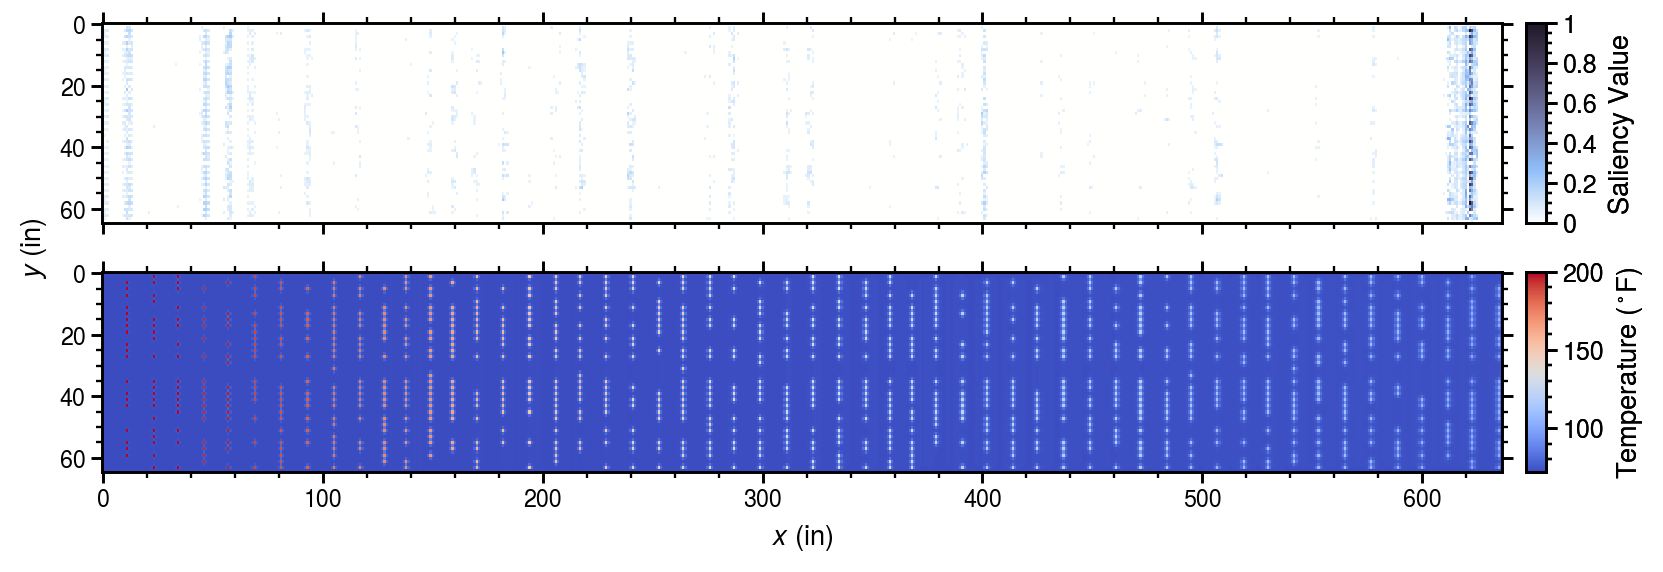

In [ ]:
def smooth_grad(model, x, y, num_samples=50, noise_level=0.01, seed=42, input_type="2D"):
    tf.random.set_seed(seed)

    x = tf.convert_to_tensor(x, dtype=tf.float32)
    y = tf.convert_to_tensor(y, dtype=tf.float32)

    x = x[tf.newaxis, ...] if len(x.shape) == 3 else x
    y = y[tf.newaxis, ...] if len(y.shape) == 1 else y
    
    if input_type == "1D":
        x = x[..., 0]
    
    smooth_grads = []

    for i in range(num_samples):
        tf.random.set_seed(seed + i)

        if input_type == "1D":
            noisy_input = x + tf.random.normal(shape=x.shape, mean=0.0, stddev=noise_level)
        elif input_type == "2D":
            noisy_input = x + tf.random.normal(shape=x.shape, mean=0.0, stddev=noise_level)
        else:
            raise ValueError("Invalid input_type. Choose '1D' or '2D'.")

        with tf.GradientTape() as tape:
            tape.watch(noisy_input)
            predictions = model(noisy_input)
            loss = tf.keras.losses.mean_squared_error(predictions, y)

        grads = tape.gradient(loss, noisy_input)
        smooth_grads.append(grads)

    smooth_grads = tf.reduce_mean(tf.stack(smooth_grads), axis=0)[0]
    return smooth_grads


# Example usage
idx1 = 26  # Select a specific index
# idx1 = np.argsort(y_train[:, 0])[-3000]
saliency_map = smooth_grad(
    models_1d[0],
    x_train[idx1],
    y_train[idx1],
    seed=0,
    input_type="1D",
    noise_level=.001
)


width = 7.0
width_default = 10.0
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, ax = pplt.subplots(refwidth=width, refheight=1.0, nrows=2)

sal = np.abs(saliency_map).squeeze().T / np.abs(saliency_map).max()
sal[sal <= 0.05] = 0.0

im1 = ax[0].imshow(
    sal, cmap="dusk", aspect="auto", interpolation="none", vmin=0.0
)
im2 = ax[1].imshow(
    x_train[idx1].squeeze().T * 140 + 72, cmap="coolwarm", aspect="auto",
    interpolation="none", vmin=72, vmax=200
)

cbar1 = fig.colorbar(
    im1, loc="r", ax=ax[0], label="Saliency Value", width=0.1,
    shrink=1.0, linewidth=lw, labelsize=font_big,
    ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
)
cbar2 = fig.colorbar(
    im2, loc="r", ax=ax[1], label=r"Temperature ($^\circ$F)", 
    width=0.1, shrink=1.0, linewidth=lw, labelsize=font_big, 
    ticks=[50, 100, 150, 200]
)

# Add minor ticks for colorbars
cbar1.ax.minorticks_on()
cbar2.ax.minorticks_on()

for i in range(2):
    ax[i].grid()
    ax[i].format(
        xticks=[0, 100, 200, 300, 400, 500, 600],
        yticks=[0, 20, 40, 60],
        xlabel=r"$\mathit{x}$ (in)",
        ylabel=r"$\mathit{y}$ (in)",
        xlabelsize=font_big,
        ylabelsize=font_big,
        xticklabelsize=font_small,
        yticklabelsize=font_small,
        titleweight="bold",
        tickdir="out",
        linewidth=lw,
    )
    ax[i].tick_params(top=True, right=True, which="both")
    ax[i].minorticks_on()

plt.tight_layout()
fig.save(PLOT_DIR + f"sal_1d_{idx1}.png", dpi=600)

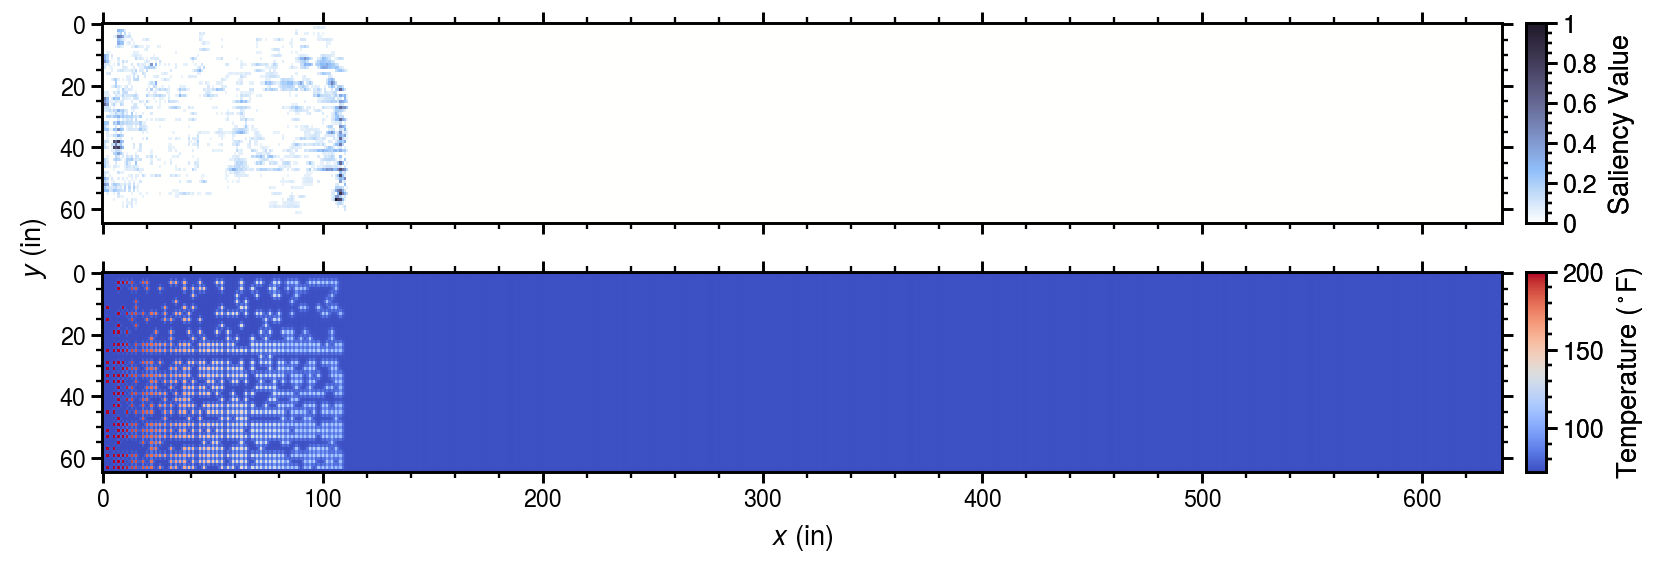

In [ ]:
# Example usage
idx1 = 26  # Select a specific index
idx1 = np.argsort(y_train[:, 0])[-3000]
saliency_map = smooth_grad(
    models_2d[0],
    x_train[idx1],
    y_train[idx1],
    seed=0,
    input_type="2D",
    noise_level=.001
)


width = 7.0
width_default = 10.0
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

fig, ax = pplt.subplots(refwidth=width, refheight=1.0, nrows=2)

sal = np.abs(saliency_map).squeeze().T / np.abs(saliency_map).max()
sal[sal <= 0.05] = 0.0

im1 = ax[0].imshow(
    sal, cmap="dusk", aspect="auto", interpolation="none", vmin=0.0
)
im2 = ax[1].imshow(
    x_train[idx1].squeeze().T * 140 + 72, cmap="coolwarm", aspect="auto",
    interpolation="none", vmin=72, vmax=200
)

cbar1 = fig.colorbar(
    im1, loc="r", ax=ax[0], label="Saliency Value", width=0.1,
    shrink=1.0, linewidth=lw, labelsize=font_big,
    ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
)
cbar2 = fig.colorbar(
    im2, loc="r", ax=ax[1], label=r"Temperature ($^\circ$F)", 
    width=0.1, shrink=1.0, linewidth=lw, labelsize=font_big, 
    ticks=[50, 100, 150, 200]
)

# Add minor ticks for colorbars
cbar1.ax.minorticks_on()
cbar2.ax.minorticks_on()

for i in range(2):
    ax[i].grid()
    ax[i].format(
        xticks=[0, 100, 200, 300, 400, 500, 600],
        yticks=[0, 20, 40, 60],
        xlabel=r"$\mathit{x}$ (in)",
        ylabel=r"$\mathit{y}$ (in)",
        xlabelsize=font_big,
        ylabelsize=font_big,
        xticklabelsize=font_small,
        yticklabelsize=font_small,
        titleweight="bold",
        tickdir="out",
        linewidth=lw,
    )
    ax[i].tick_params(top=True, right=True, which="both")
    ax[i].minorticks_on()

plt.tight_layout()
fig.save(PLOT_DIR + f"sal_2d_{idx1}.png", dpi=600)

### Example Input Data to Model

In [3]:
from pastillation.data.preprocess_data import gen_cnn_data
(
    x_train,
    x_val,
    x_test,
    y_train,
    y_val,
    y_test,
    xmin,
    xmax,
) = gen_cnn_data(fold_number=0)

x_train shape: (12800, 637, 65, 1)
x_val shape: (3200, 637, 65, 1)
x_test shape: (4000, 637, 65, 1)
y_train shape: (12800, 1)
y_val shape: (3200, 1)
y_test shape: (4000, 1)


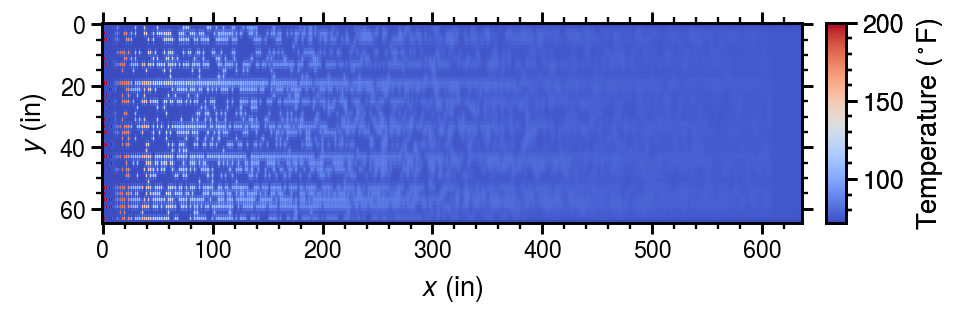

In [10]:

width = 3.5
width_default = 5.0
ratio = width / width_default

font_big = 14 * ratio
font_small = 12 * ratio
lw = 1.5 * ratio

idx1 = 0

fig, ax = pplt.subplots(refwidth=width, refheight=1.0, nrows=1)

im2 = ax.imshow(
    x_train[idx1].squeeze().T * 140 + 72, cmap="coolwarm", aspect="auto",
    interpolation="none", vmin=72, vmax=200
)


cbar2 = fig.colorbar(
    im2, loc="r", ax=ax, label=r"Temperature ($^\circ$F)", 
    width=0.1, shrink=1.0, linewidth=lw, labelsize=font_big, 
    ticks=[50, 100, 150, 200]
)


cbar2.ax.minorticks_on()

ax.grid()
ax.format(
    xticks=[0, 100, 200, 300, 400, 500, 600],
    yticks=[0, 20, 40, 60],
    xlabel=r"$\mathit{x}$ (in)",
    ylabel=r"$\mathit{y}$ (in)",
    xlabelsize=font_big,
    ylabelsize=font_big,
    xticklabelsize=font_small,
    yticklabelsize=font_small,
    titleweight="bold",
    tickdir="out",
    linewidth=lw,
)
ax.tick_params(top=True, right=True, which="both")
ax.minorticks_on()

plt.tight_layout()
fig.save(PLOT_DIR + f"overview_sim.png", dpi=600)